In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from neurodyn import LaggingFunction
import scipy

**Example with very irregular times**

not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact


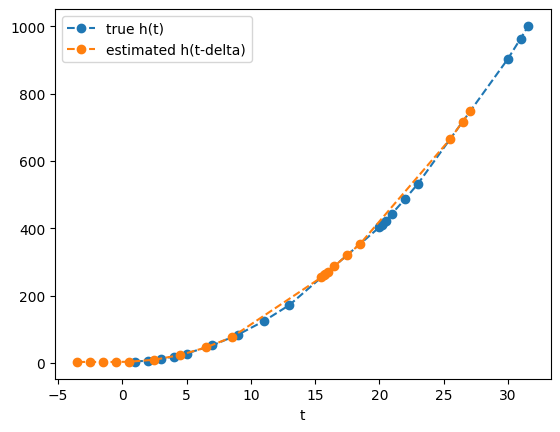

In [3]:
h_of_t = lambda t: t**2+3  # dummy function so we can generate values for h(t)
h_delay = LaggingFunction([0], [h_of_t(0)], 4.5)
h_delay_ests = []
ts = np.array([1,2,3,4,5, 7,9,11,13, 20,20.2,20.3,20.5, 21,22,23, 30,31, 31.6])

for t in ts:
	h_delay_ests.append(h_delay(t, h_of_t(t)))

fig, ax = plt.subplots()
ax.plot(ts, h_of_t(ts), '--o', label='true h(t)')
ax.plot(ts-h_delay.delta, h_delay_ests, '--o', label='estimated h(t-delta)')
ax.set_xlabel('t')
ax.legend()
plt.show()

**Example with exact delay matchup (delta is an integer multiple of dt)**

not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact


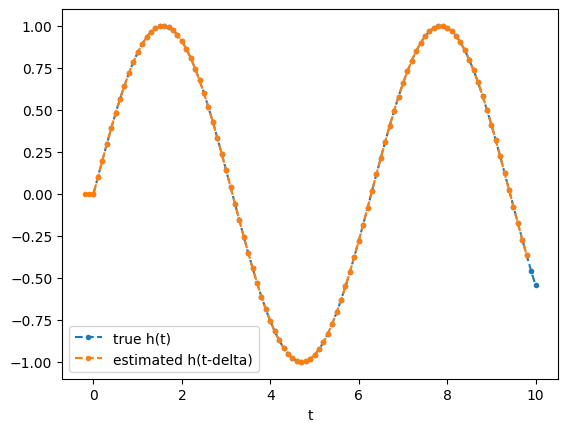

In [4]:
h_of_t = lambda t: np.sin(t)  # dummy function so we can generate values for h(t)
h_delay = LaggingFunction([0], [h_of_t(0)], 0.2)
h_delay_ests = []
ts = np.linspace(0, 10, 101)

for t in ts:
	h_delay_ests.append(h_delay(t, h_of_t(t)))

fig, ax = plt.subplots()
ax.plot(ts, h_of_t(ts), '--.', label='true h(t)')
ax.plot(ts-h_delay.delta, h_delay_ests, '--.', label='estimated h(t-delta)')
ax.set_xlabel('t')
ax.legend()
plt.show()

**Example with okay delays**

not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact
not exact


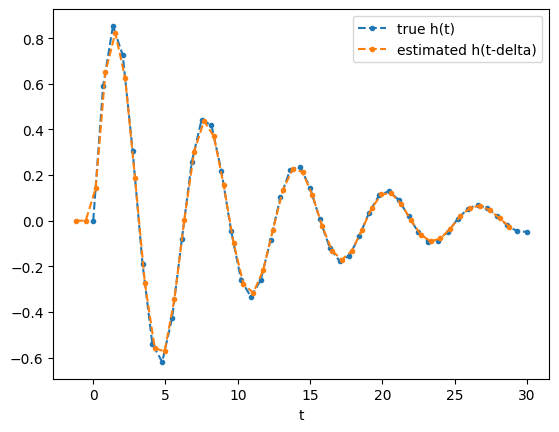

In [6]:
h_of_t = lambda t: np.sin(t)*np.exp(-0.1*t)  # dummy function so we can generate values for h(t)
h_delay = LaggingFunction([0], [h_of_t(0)], 1.2)
h_delay_ests = []
ts = np.linspace(0, 30, 45)

for t in ts:
	h_delay_ests.append(h_delay(t, h_of_t(t)))

fig, ax = plt.subplots()
ax.plot(ts, h_of_t(ts), '--.', label='true h(t)')
ax.plot(ts-h_delay.delta, h_delay_ests, '--.', label='estimated h(t-delta)')
ax.set_xlabel('t')
ax.legend()
plt.show()

**delta=0 should return the exact same function**

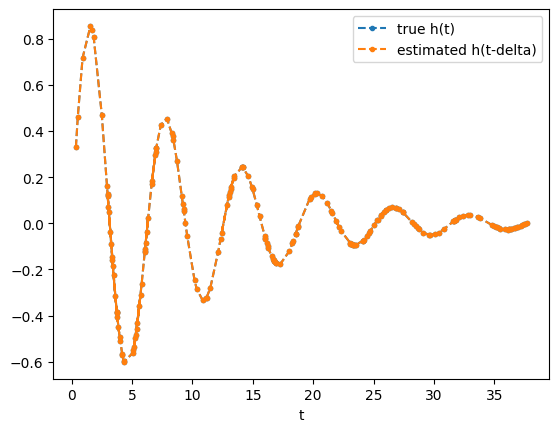

In [7]:
h_of_t = lambda t: np.sin(t)*np.exp(-0.1*t)  # dummy function so we can generate values for h(t)
h_delay = LaggingFunction([0], [h_of_t(0)], delta=0.0)
h_delay_ests = []
# ts = np.linspace(0, 30, 45)
np.random.seed(42)
ts = np.cumsum(np.random.normal(0.2, 0.3, 200))  # a non-strictly increasing array of t

for t in ts:
	h_delay_ests.append(h_delay(t, h_of_t(t)))

fig, ax = plt.subplots()
ax.plot(ts, h_of_t(ts), '--.', label='true h(t)')
ax.plot(ts-h_delay.delta, h_delay_ests, '--.', label='estimated h(t-delta)')
ax.set_xlabel('t')
ax.legend()
plt.show()

In [8]:
assert (h_delay_ests == h_of_t(ts)).all()

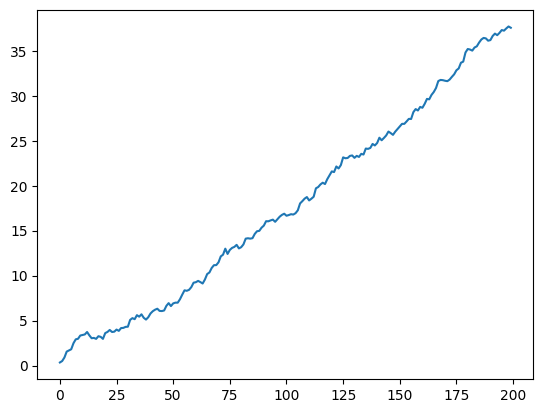

In [9]:
plt.plot(ts);

**Example with cycling RNN**

In [23]:
from neurodyn import LowRankCyclingRNN, make_F_G_valentin, sigmoid, plot_overlap_trajectory

simulation time: 100.00%|██████████| t=40.000 of 40 [00:00<00:00]


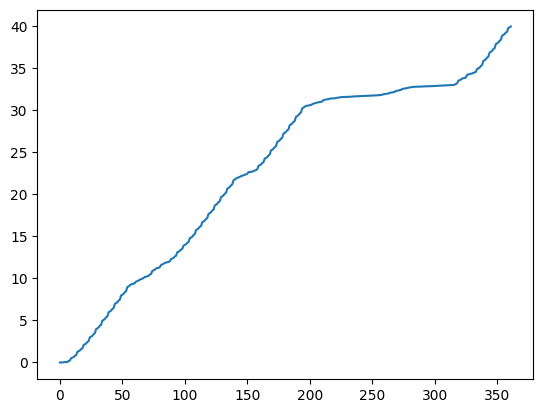

In [24]:
rnn = LowRankCyclingRNN(*make_F_G_valentin(2, 1000, sigmoid), sigmoid, lambda t: 0, delta=10)
res = rnn.simulate_h(h0=rnn.F[:, 0], t_span=(0, 40), dt_max=1, progress=True)
# plot_overlap_trajectory(rnn, res);
plt.plot(rnn.h_lagging.ts);